# **SÉRIES TEMPORAIS EM FINANÇAS**

## **Objetivo** <br>
Avaliar o entendimento dos conceitos básicos de séries temporais e a capacidade de aplicá-los na análise de dados financeiros de empresas líderes de tecnologia listadas na bolsa de valores.

### **Comparação no Setor de Tecnologia**

- MICROSOFT: MSFT
- ALPHABET INC: GOGL
- TESLA, INC: TSLA
- AMAZONCOM, INC: AMZON
- APPLE INC: AAPL
- META: META
- NVIDIA: NVDA

## **Etapas de análise**

- Pré-processamento
- Análise Exploratória
- Modelos de Decomposição
- Testes de Estacionaridade
- Modelos de Predição ML (AutoARIMA, Theta Forecaster, Prophet)
- Avaliação dos Modelos (Métricas)
- Análise de Indicadores Financeiros
  - Caudas pesadas
  - Efeitos de Alavancagem


## **Pré-processamento**

### Importando a base de dados

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# símbolos das empresas e intervalo de datas
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']
start_date = '2015-01-01'
end_date = '2023-11-22'

data = yf.download(symbols, start=start_date, end=end_date)


[*********************100%%**********************]  7 of 7 completed


In [ ]:
data_adj_close = data.iloc[:, data.columns.get_level_values(0)=='Adj Close']
data_adj_close.columns = data_adj_close.columns.droplevel()

data_adj_close.head()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2015-01-02,24.466454,15.4260,26.477501,78.449997,40.452740,4.832805,14.620667
2015-01-05,23.777193,15.1095,25.973000,77.190002,40.080730,4.751178,14.006000
2015-01-06,23.779423,14.7645,25.332001,76.150002,39.492462,4.607129,14.085333
2015-01-07,24.112871,14.9210,25.257500,76.150002,39.994225,4.595125,14.063333
2015-01-08,25.039339,15.0230,25.345501,78.180000,41.170788,4.767983,14.041333


In [ ]:
print(data.columns)

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            ('Adj Close',  'NVDA'),
            ('Adj Close',  'TSLA'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (    'Close',  'NVDA'),
            (    'Close',  'TSLA'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (     'High',  'NVDA'),
            (     'High',  'TSLA'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (      'Low',  'NVDA'),
            (      'Low',  '

### Variáveis de Análise

- **Date (Data - Índice)**: Data a qual se refere o devido valor
- **Adj Close (Fechamento Ajustado)**: Preço de fechamento de uma ação que foi ajustado para incluir quaisquer ddsitribuições de dividendos e mudanças devido a eventos corporativos.
- **Close (Fechamento)**:  Último preço o qual a ação foi negociado no durante um dia específico.
- **High (Alta)**: O preço mais alto que uma ação foi negociada no dia específico.
- **Low (Baixa)**:  O preço mais baixo que uma ação foi negociada no dia específico.
- **Open (Abertura)**:  O preço de início da ação no dia em específico.
- **Volume**: Total de ações negociadas no dia.

In [ ]:
data.count()

Price      Ticker
Adj Close  AAPL      2238
           AMZN      2238
           GOOGL     2238
           META      2238
           MSFT      2238
           NVDA      2238
           TSLA      2238
Close      AAPL      2238
           AMZN      2238
           GOOGL     2238
           META      2238
           MSFT      2238
           NVDA      2238
           TSLA      2238
High       AAPL      2238
           AMZN      2238
           GOOGL     2238
           META      2238
           MSFT      2238
           NVDA      2238
           TSLA      2238
Low        AAPL      2238
           AMZN      2238
           GOOGL     2238
           META      2238
           MSFT      2238
           NVDA      2238
           TSLA      2238
Open       AAPL      2238
           AMZN      2238
           GOOGL     2238
           META      2238
           MSFT      2238
           NVDA      2238
           TSLA      2238
Volume     AAPL      2238
           AMZN      2238
           GOOGL    

### Dados Duplicados/Nulos

In [ ]:
# verificando dados nulos
null_data = data.isnull().any()

# verificando dados duplicados
duplicate_data = data.duplicated(keep=False)

# Imprimindo os resultados
print("Dados Nulos:")
print(null_data)

print("\nDados Duplicados:")
print(duplicate_data)


Dados Nulos:
Price      Ticker
Adj Close  AAPL      False
           AMZN      False
           GOOGL     False
           META      False
           MSFT      False
           NVDA      False
           TSLA      False
Close      AAPL      False
           AMZN      False
           GOOGL     False
           META      False
           MSFT      False
           NVDA      False
           TSLA      False
High       AAPL      False
           AMZN      False
           GOOGL     False
           META      False
           MSFT      False
           NVDA      False
           TSLA      False
Low        AAPL      False
           AMZN      False
           GOOGL     False
           META      False
           MSFT      False
           NVDA      False
           TSLA      False
Open       AAPL      False
           AMZN      False
           GOOGL     False
           META      False
           MSFT      False
           NVDA      False
           TSLA      False
Volume     AAPL      Fal

### Normalização


In [ ]:
def zero_to_one(value):
    return 0.1 if value == 0 else value

empresas = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
data_adj_close_norm = data_adj_close.copy()
data_adj_close_norm.reset_index(inplace=True)

for empresa in empresas:
    min_value = data_adj_close_norm[empresa].min()
    max_value = data_adj_close_norm[empresa].max()
    data_adj_close_norm[empresa] = (data_adj_close_norm[empresa] - min_value) / (max_value - min_value)
    data_adj_close_norm[empresa] = data_adj_close_norm[empresa].apply(zero_to_one)

data_adj_close_norm.set_index('Date', inplace=True)


# **Modelo AutoArima**

Revisando, temos que o modelo ARIMA é composto por três componentes principais:<br>

**AR (Autoregressivo):** Este componente usa a relação entre uma observação e um número de observações passadas.<br>

**I (Integrado):** Representa a diferenciação dos dados brutos, o que pode ajudar a tornar a série temporal estacionária.<br>

**MA (Médias Móveis):** Modela o erro da previsão como uma combinação linear dos erros passados.

O AutoARIMA automatiza a seleção desses três parâmetros: p (ordem do componente autoregressivo), d (grau de diferenciação), e q (ordem do componente de médias móveis). Isso é feito através dos seguintes passos:<br>

**Teste de Estacionariedade:** faz um teste de estacionariedade (como o teste Dickey-Fuller) para determinar se a série temporal é estacionária ou se precisa de diferenciação (determinando assim o parâmetro d). <br>

**Identificação Automática de p e q:** usa métodos como a Função de Autocorrelação (ACF) e a Função de Autocorrelação Parcial (PACF), junto com critérios de informação como AIC (Critério de Informação de Akaike) ou BIC (Critério de Informação Bayesiano), para identificar os melhores valores para p e q.<br>

**Treinamento e Validação:** O modelo tenta várias combinações de p, d e q, e valida cada modelo potencial, geralmente através da divisão dos dados em conjuntos de treinamento e teste ou usando validação cruzada. <br>

**Seleção do Melhor Modelo:** O modelo com a melhor performance, geralmente aquele com o menor valor de AIC/BIC, é selecionado como o modelo final.<br>

In [ ]:
!pip install yfinance pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import pandas as pd

symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']

autoarima_models = {}


for symbol in symbols:
    print(f"Modelando {symbol} com AutoARIMA...")

    # Selecionando a série temporal normalizada para a ação atual
    series = data_adj_close_norm[symbol].dropna()

    # Ajustando o modelo AutoARIMA
    model = auto_arima(series, seasonal=False, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)

    autoarima_models[symbol] = model

    print(model.summary())


Modelando MSFT com AutoARIMA...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14283.615, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14245.151, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14283.649, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14286.873, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14242.950, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14287.621, Time=5.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14284.076, Time=5.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14285.612, Time=2.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14286.989, Time=2.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14285.527, Time=1.90 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14283.220, Time=1.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 22.729 seconds
                               SARIMAX Results                                
Dep. Variable:      

In [ ]:
serie_temporal = df['sua_coluna_temporal']

## Análise de Resíduos

**Normalidade:**
Idealmente, os resíduos devem estar próximos de uma distribuição normal. Isso pode ser verificado com um histograma dos resíduos ou um gráfico Q-Q (quantil-quantil).

**Autocorrelação:** Um gráfico de autocorrelação dos resíduos pode ajudar a identificar se há alguma autocorrelação remanescente entre eles.

Análise de Resíduos para MSFT


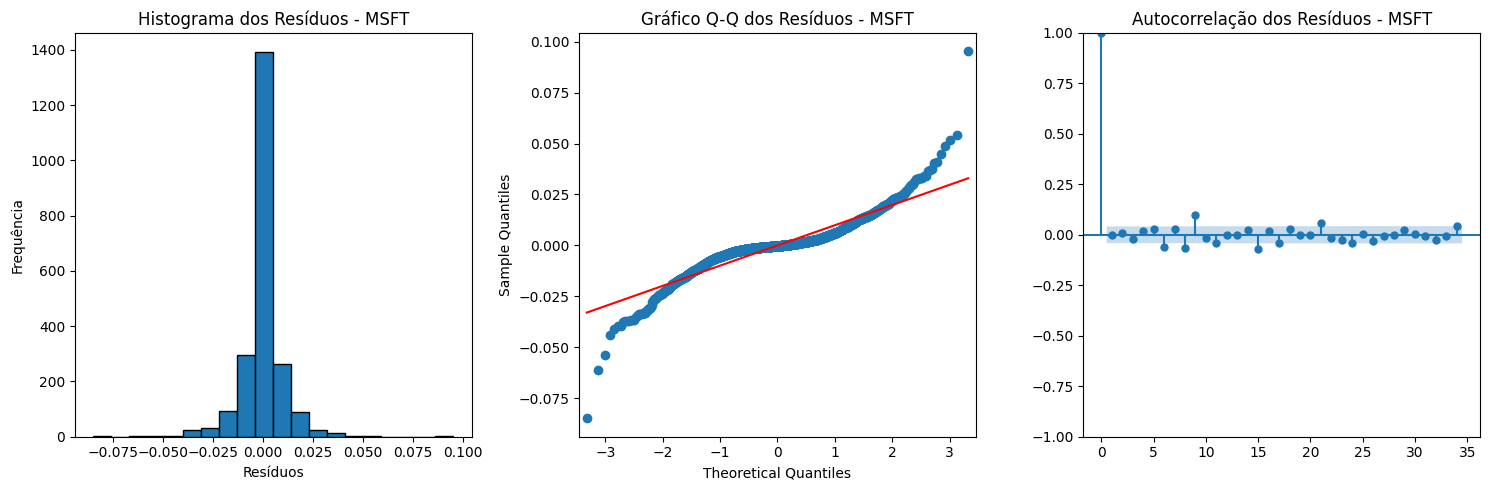

Análise de Resíduos para GOOGL


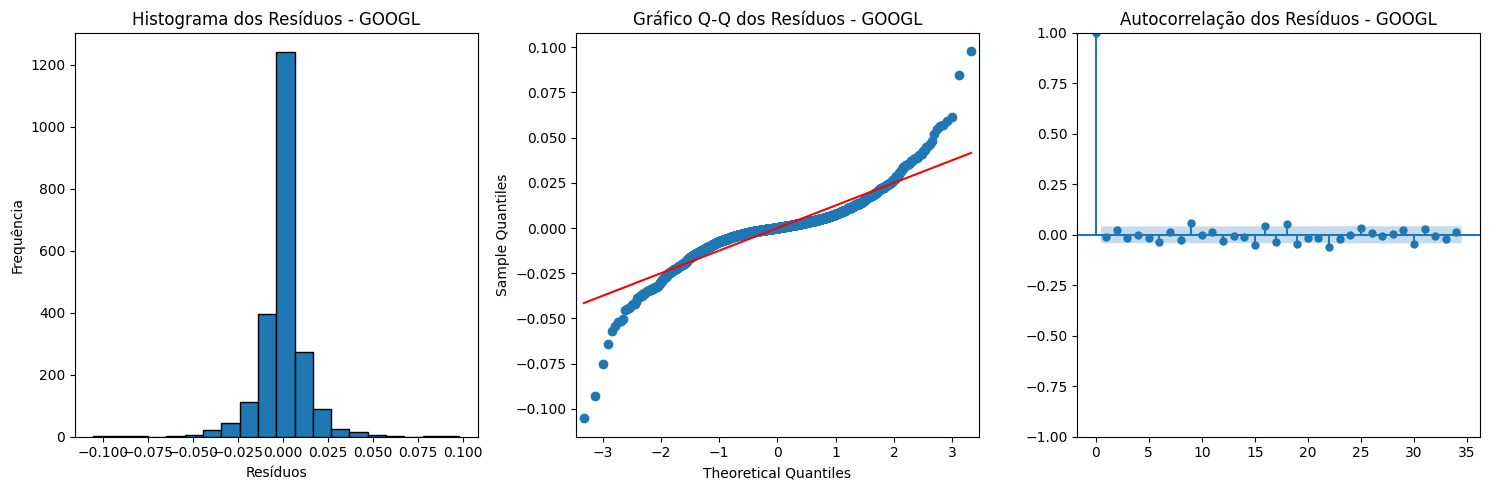

Análise de Resíduos para TSLA


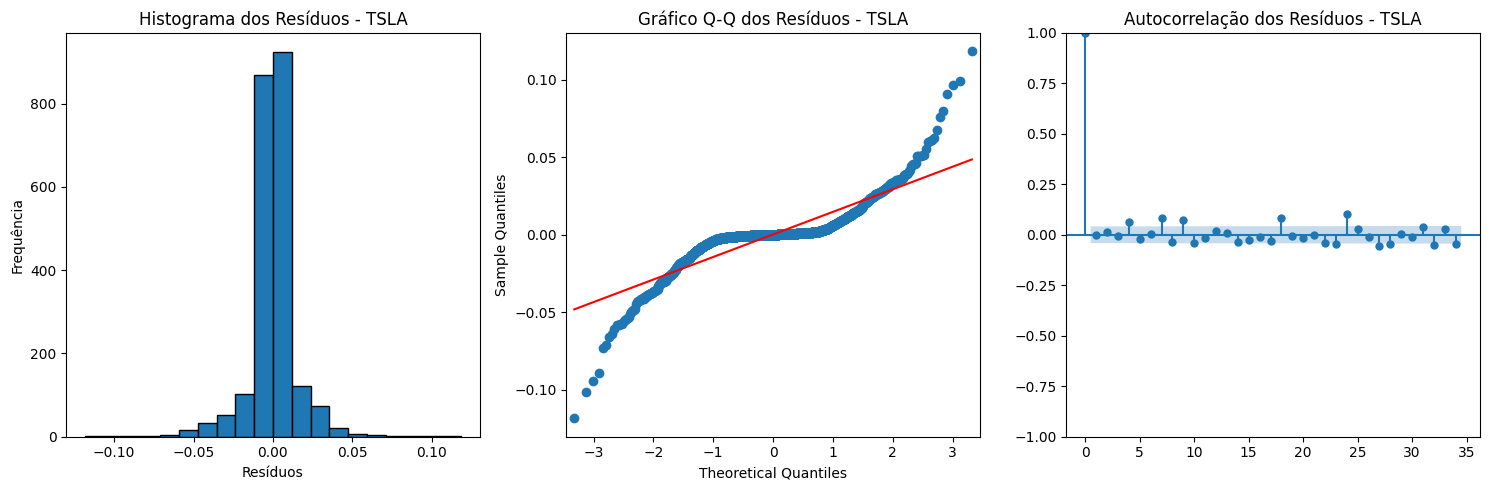

Análise de Resíduos para AMZN


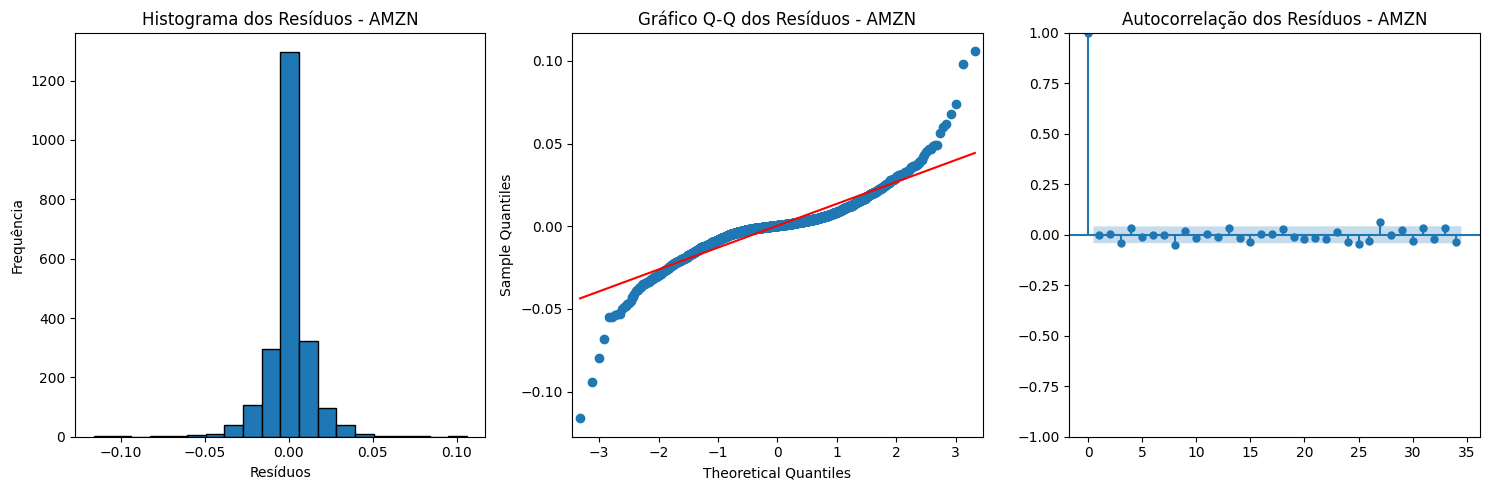

Análise de Resíduos para AAPL


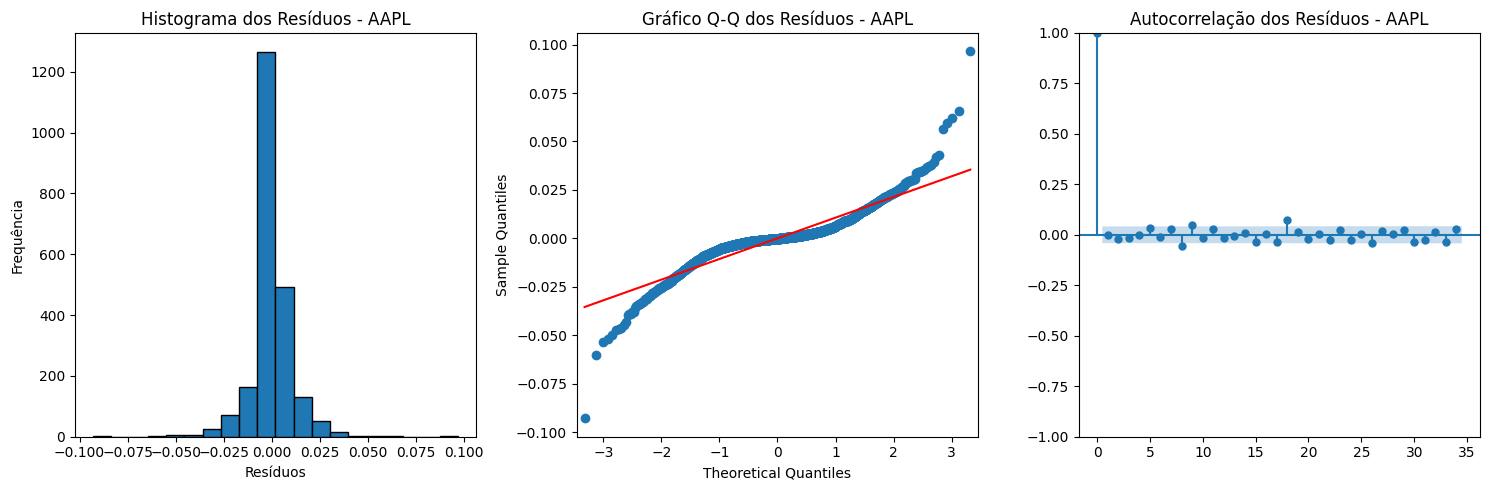

Análise de Resíduos para META


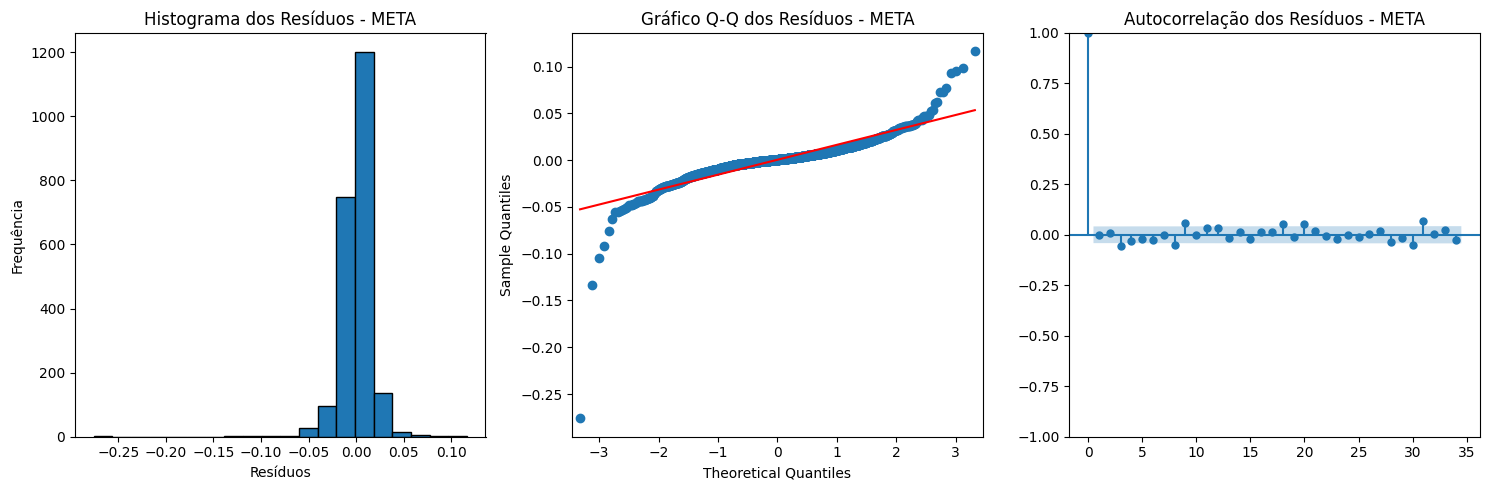

Análise de Resíduos para NVDA


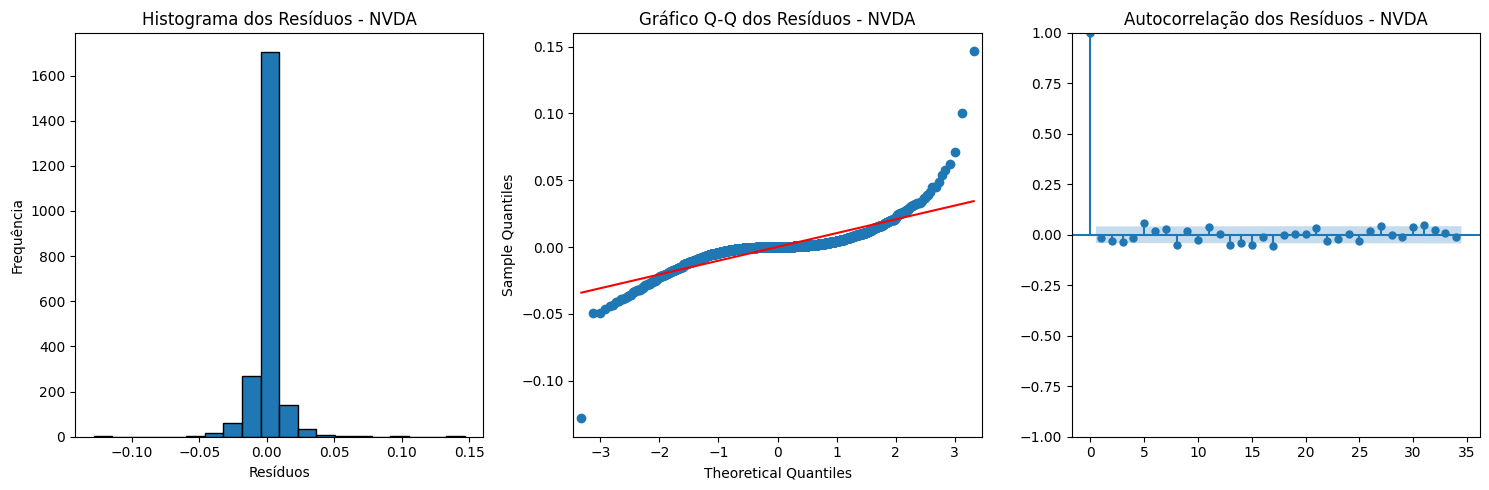

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


for symbol, model in autoarima_models.items():
    print(f"Análise de Resíduos para {symbol}")
    residuos = model.resid()

    # Histograma dos Resíduos
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(residuos, bins=20, edgecolor='black')
    plt.title(f'Histograma dos Resíduos - {symbol}')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')

    # Gráfico Q-Q dos Resíduos
    plt.subplot(1, 3, 2)
    sm.qqplot(residuos, line='s', ax=plt.gca())
    plt.title(f'Gráfico Q-Q dos Resíduos - {symbol}')

    # Autocorrelação dos Resíduos
    plt.subplot(1, 3, 3)
    plot_acf(residuos, alpha=0.05, ax=plt.gca())
    plt.title(f'Autocorrelação dos Resíduos - {symbol}')

    plt.tight_layout()
    plt.show()


## **Análise de Desempenho de Previsão**

Após divisão dos dados em conjuntos de treinamento e teste, avalia-se o desempenho do modelo no conjunto de teste. Métricas comuns incluem o erro quadrático médio (MSE) e o erro absoluto médio (MAE).


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'MSFT':
MSE: 1361.4290787256805
MAE: 31.15944683488204
SMAPE: 0.0


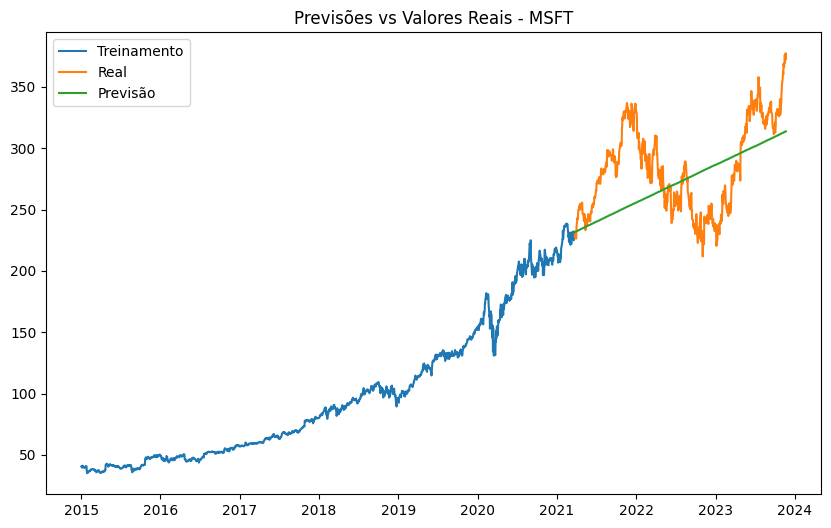

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from plotly.subplots import make_subplots
import numpy as np
# Função para calcular o SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

if ('Adj Close', 'MSFT') in data.columns:
    msft_data = data['Adj Close']['MSFT']
else:
    print("Erro: Dados de 'MSFT' não encontrados no DataFrame.")
    exit()

# divisão de treinamento e teste
train_size = int(len(msft_data) * 0.7)
train, test = msft_data[:train_size], msft_data[train_size:]

# ajuste do modelo AutoARIMA
model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

# métricas de desempenho
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'MSFT':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

# plot das previsões versus os valores reais
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - MSFT")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'AAPL':
MSE: 402.8874419482019
MAE: 16.489383474232188
SMAPE: 10.84


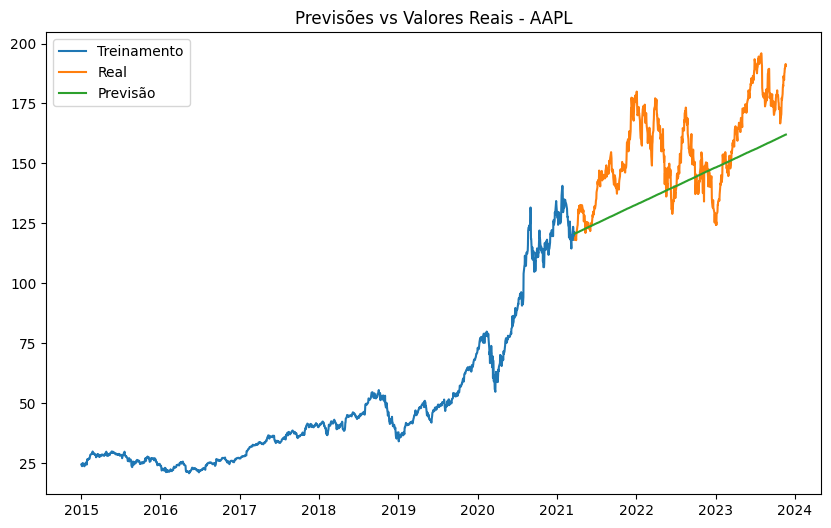

In [ ]:
def smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) /
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

if ('Adj Close', 'AAPL') in data.columns:
    aapl_data = data['Adj Close']['AAPL']
else:
    print("Erro: Dados de 'AAPL' não encontrados no DataFrame.")
    exit()

train_size = int(len(aapl_data) * 0.7)
train, test = aapl_data[:train_size], aapl_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'AAPL':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - AAPL")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'AMZN':
MSE: 4336.601009579252
MAE: 53.59678426978316
SMAPE: 0.0


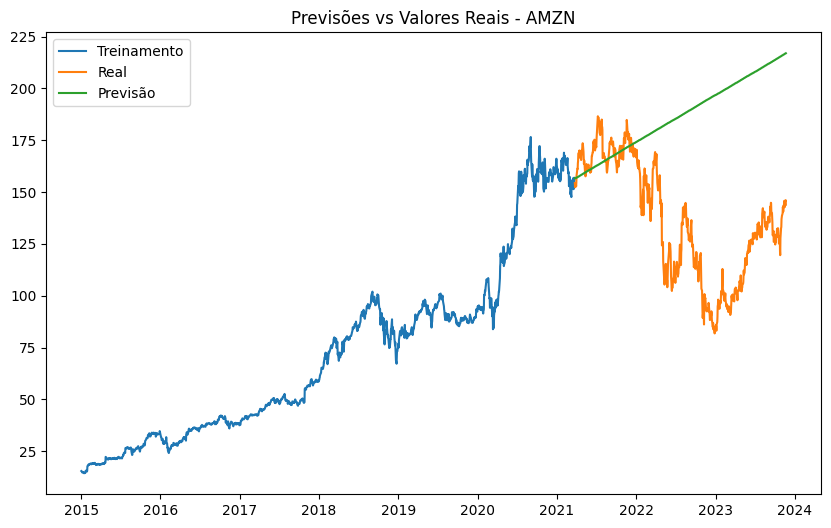

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

if ('Adj Close', 'AMZN') in data.columns:
    amzn_data = data['Adj Close']['AMZN']
else:
    print("Erro: Dados de 'AMZN' não encontrados no DataFrame.")
    exit()

train_size = int(len(amzn_data) * 0.7)
train, test = amzn_data[:train_size], amzn_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'AMZN':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - AMZN")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'GOOGL':
MSE: 461.74684371650454
MAE: 17.90608326189071
SMAPE: 0.0


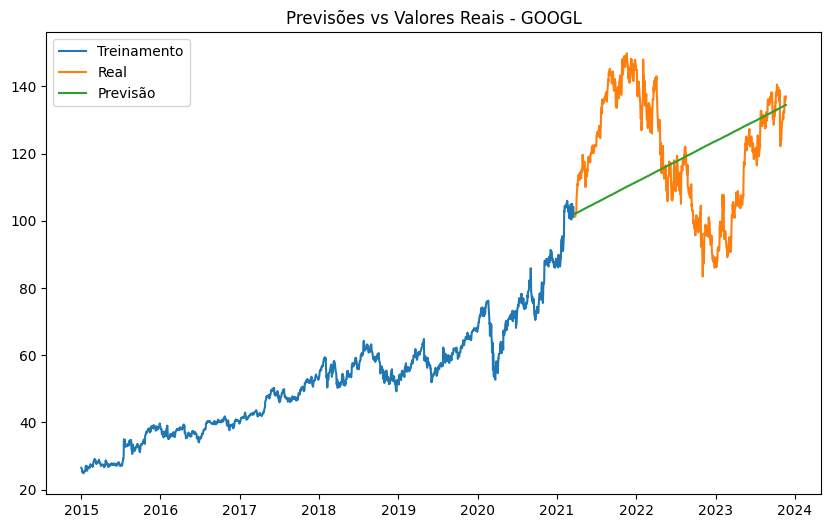

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

if ('Adj Close', 'GOOGL') in data.columns:
    googl_data = data['Adj Close']['GOOGL']
else:
    print("Erro: Dados de 'GOOGL' não encontrados no DataFrame.")
    exit()

train_size = int(len(googl_data) * 0.7)
train, test = googl_data[:train_size], googl_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'GOOGL':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - GOOGL")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'TSLA':
MSE: 391598.7920419623
MAE: 553.5238870227871
SMAPE: 0.0


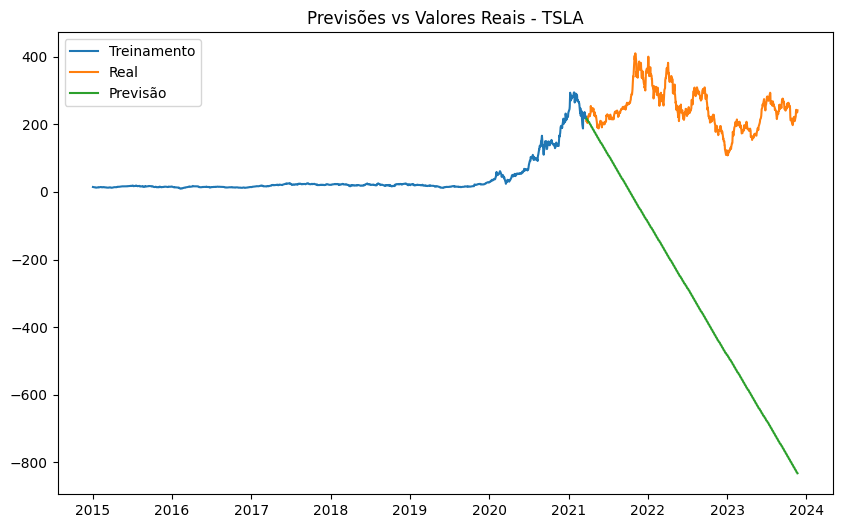

In [ ]:

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

if ('Adj Close', 'TSLA') in data.columns:
    tsla_data = data['Adj Close']['TSLA']
else:
    print("Erro: Dados de 'TSLA' não encontrados no DataFrame.")
    exit()

train_size = int(len(tsla_data) * 0.7)
train, test = tsla_data[:train_size], tsla_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'TSLA':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - TSLA")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'META':
MSE: 15782.768194765435
MAE: 104.31218533955686
SMAPE: 0.0


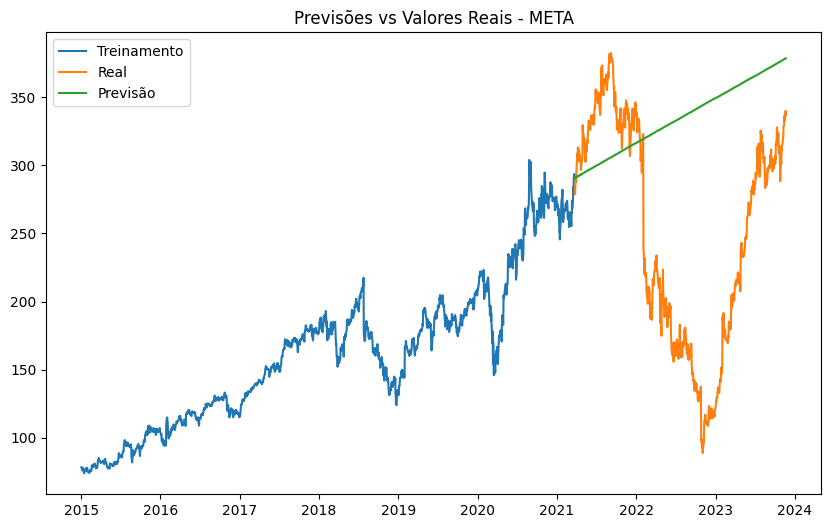

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

if ('Adj Close', 'META') in data.columns:
    meta_data = data['Adj Close']['META']
else:
    print("Erro: Dados de 'META' não encontrados no DataFrame.")
    exit()

train_size = int(len(meta_data) * 0.7)
train, test = meta_data[:train_size], meta_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'META':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - META")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Desempenho do Modelo para 'NVDA':
MSE: 17647.522319467433
MAE: 97.59233815669783
SMAPE: 0.0


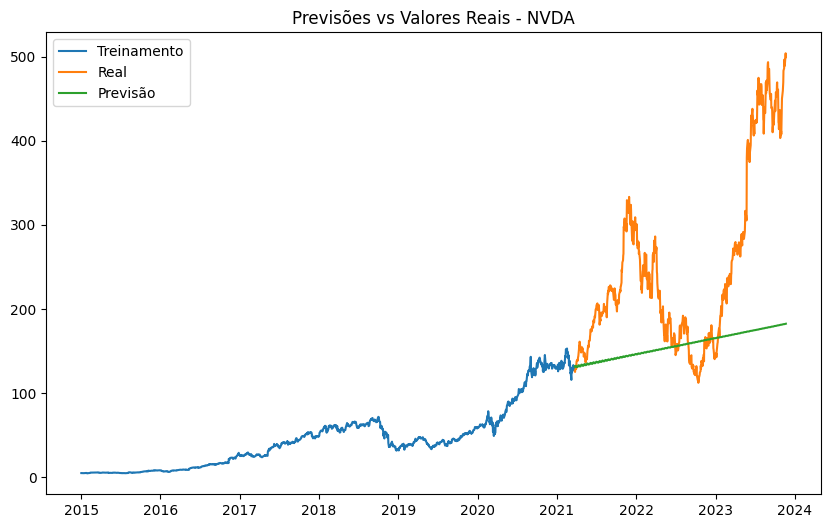

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

if ('Adj Close', 'NVDA') in data.columns:
    nvda_data = data['Adj Close']['NVDA']
else:
    print("Erro: Dados de 'NVDA' não encontrados no DataFrame.")
    exit()

train_size = int(len(nvda_data) * 0.7)
train, test = nvda_data[:train_size], nvda_data[train_size:]

model = auto_arima(train, seasonal=False, stepwise=True, error_action='ignore', suppress_warnings=True)
predictions = model.predict(n_periods=len(test))

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
smape_value = smape(test, predictions)

print(f"Desempenho do Modelo para 'NVDA':")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"SMAPE: {smape_value}")

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treinamento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, predictions, label='Previsão')
plt.title("Previsões vs Valores Reais - NVDA")
plt.legend()
plt.show()
